<a href="https://colab.research.google.com/github/gokulakrishnanbalaji/ProCode-Kaggle/blob/main/ProCode_ML_starter_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Competition website: [Kaggle competition link](https://www.kaggle.com/competitions/playground-series-s4e1/)

In [86]:
! wget -O train.csv https://raw.githubusercontent.com/gokulakrishnanbalaji/ProCode-Kaggle/main/train.csv
! wget -O test.csv https://raw.githubusercontent.com/gokulakrishnanbalaji/ProCode-Kaggle/main/test.csv
! wget -O sample_submission.csv https://raw.githubusercontent.com/gokulakrishnanbalaji/ProCode-Kaggle/main/sample_submission.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


# Importing Libraries


In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Data Exploration and analysis

In [88]:
# Load the dataset
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")


In [89]:
# Explore the first few rows
# train_data.head()
# train_data.info()
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [90]:
# Shape of df
train_data.shape


(165034, 14)

In [91]:
# check for null values
train_data.isna().any()

id                 False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [92]:
# Identify unwanted column and remove them in both train and test
train_data=train_data.drop(['id','CustomerId','Surname'],axis=1)
y_id = test_data['id']
test_data=test_data.drop(['id','CustomerId','Surname'],axis=1)

In [93]:
# check for duplicates
train_data.duplicated().sum()

123

In [94]:
# Drop the duplicates
train_data=train_data.drop_duplicates()
train_data.duplicated().sum()
test_data=test_data.drop_duplicates()

In [95]:
# Separate numerical and categorical data
num_train_data=train_data.select_dtypes(include=np.number)
cat_train_data=train_data.select_dtypes(exclude=np.number)

num_test_data=test_data.select_dtypes(include=np.number)
cat_test_data=test_data.select_dtypes(exclude=np.number)

In [96]:
# check correlation among numerical data cols
corr=num_train_data.corr()
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.008832,0.000969,0.006880,0.011360,-0.002851,0.014944,-0.001866,-0.027541
Age,-0.008832,1.000000,-0.010797,0.064426,-0.102274,-0.012282,0.003161,-0.005533,0.341009
Tenure,0.000969,-0.010797,1.000000,-0.009532,0.007387,0.005358,-0.005509,0.001082,-0.019557
Balance,0.006880,0.064426,-0.009532,1.000000,-0.360986,-0.018569,-0.014984,0.008566,0.129669
NumOfProducts,0.011360,-0.102274,0.007387,-0.360986,1.000000,0.005441,0.039741,-0.004322,-0.214598
HasCrCard,-0.002851,-0.012282,0.005358,-0.018569,0.005441,1.000000,-0.021023,0.004581,-0.022141
IsActiveMember,0.014944,0.003161,-0.005509,-0.014984,0.039741,-0.021023,1.000000,-0.008084,-0.210254
EstimatedSalary,-0.001866,-0.005533,0.001082,0.008566,-0.004322,0.004581,-0.008084,1.000000,0.018722
Exited,-0.027541,0.341009,-0.019557,0.129669,-0.214598,-0.022141,-0.210254,0.018722,1.000000


# Data Preprocessing

In [97]:
# Label encode for categorical variable for train and test

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for columns in cat_train_data.columns:
    labelencoder.fit(train_data[columns])
    train_data[columns]=labelencoder.transform(train_data[columns])
train_data.head()

for columns in cat_test_data.columns:
    labelencoder.fit(test_data[columns])
    test_data[columns]=labelencoder.transform(test_data[columns])
test_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00


# Feature engineering

In [98]:
# Create new col called balance_per_salary
train_data['balance_per_salary']=train_data['Balance']/train_data['EstimatedSalary']
# train_data.drop(columns=['Balance','EstimatedSalary'])
train_data

test_data['balance_per_salary']=test_data['Balance']/test_data['EstimatedSalary']
test_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,balance_per_salary
0,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75,0.000000
1,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27,0.000000
2,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09,0.000000
3,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57,0.000000
4,752,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00,0.869703
...,...,...,...,...,...,...,...,...,...,...,...
110018,570,2,1,29.0,7,116099.82,1,1.0,1.0,148087.62,0.783994
110019,575,0,0,36.0,4,178032.53,1,1.0,1.0,42181.68,4.220613
110020,712,0,1,31.0,2,0.00,2,1.0,0.0,16287.38,0.000000
110021,709,0,0,32.0,3,0.00,1,1.0,1.0,158816.58,0.000000


In [99]:
# Scale features in both train and test data

from sklearn.preprocessing import MinMaxScaler
maxminscaler=MinMaxScaler()
# ml_train=pd.DataFrame(maxminscaler.fit_transform(train_data.drop(columns=['Exited'])))
# ml_train
for col in train_data.columns:
    if col !='Exited':
        # maxminscaler.fit_transform(train_data[[col]])
        train_data[col]=maxminscaler.fit_transform(train_data[[col]])
        
train_data.head()

for col in test_data.columns:
    if col !='Exited':
        test_data[col]=maxminscaler.fit_transform(test_data[[col]])
        
test_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,balance_per_salary
0,0.472,0.0,0.0,0.067568,0.2,0.000000,0.333333,0.0,1.0,0.804903,0.000000
1,0.666,0.0,0.0,0.378378,0.2,0.000000,0.000000,1.0,0.0,0.362723,0.000000
2,0.612,0.0,0.0,0.216216,0.7,0.000000,0.333333,1.0,0.0,0.694419,0.000000
3,0.662,0.0,1.0,0.243243,0.8,0.000000,0.000000,1.0,0.0,0.569654,0.000000
4,0.804,0.5,1.0,0.270270,1.0,0.483318,0.000000,1.0,0.0,0.697164,0.000082


# Model Selection

In [100]:
# split data as train and test

from sklearn.model_selection import train_test_split
y=train_data['Exited']
x=train_data.drop(columns=['Exited'])
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=72)
print(train_x.shape)
test_x.shape


(110490, 11)


(54421, 11)

In [101]:
# we will train with logistic regression and XGboost

In [102]:
# Use logistic regression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_x,train_y)
logreg_ypred = logreg.predict(test_x)
logreg_ypred


array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [103]:
! pip install xgboost


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\B Vasundhara\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [104]:
# Use xgboost

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(train_x,train_y)
xgb_pred = xgb.predict(test_x)
xgb_pred

array([0, 0, 0, ..., 0, 1, 0])

# Model Evaluation

In [105]:
# F1 score for logistic regression

from sklearn.metrics import f1_score
f1_score(test_y,logreg_ypred)



0.4580335731414869

In [106]:
# F1 score for XGBoost

from sklearn.metrics import f1_score
f1_score(test_y,xgb_pred)

0.6377964354102224

# Hyperparameter Tuning

In [107]:
#Tweak the parameters n_estimators, max_depth ,learning_rate

from sklearn.model_selection import GridSearchCV
paramdict={'n_estimators':[50,100],'max_depth':[2,5],'learning_rate':[0.1,0.01]}
gridsearch = GridSearchCV(estimator=xgb,param_grid=paramdict,cv=5)
gridsearch.fit(train_x,train_y)
xgb_gsv_ypred=gridsearch.predict(test_x)


In [108]:
# f1 score for the grid_search
f1_score(test_y,xgb_gsv_ypred)


0.6410319531288464

# Performance Report

In [109]:
# plot confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(test_y,xgb_gsv_ypred)



array([[40620,  2176],
       [ 5115,  6510]], dtype=int64)

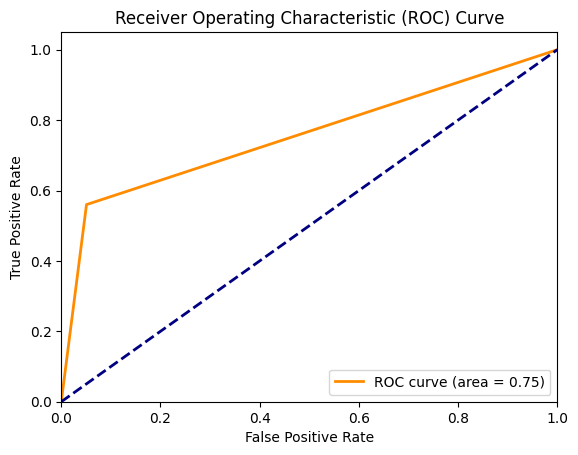

In [110]:
# ROC Curve

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(test_y, xgb_gsv_ypred)

# Compute Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show() 

# Submission

In [111]:
# make predictions using the latest model
y_pred  = gridsearch.predict(test_data)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [112]:
# make submission dataframe
y_pred = pd.DataFrame(y_pred,columns=['Exited'])
y_pred['id']=y_id
y_pred


,Exited,id
0,0,165034
1,1,165035
2,0,165036
3,0,165037
4,0,165038
...,...,...
109946,0,274980
109947,0,274981
109948,0,274982
109949,0,274983


In [113]:
# convert submission to csv
y_pred.to_csv('submission.csv',index=False)
